In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None, 'undefined'])
df.head()

Bearer Id            Start  Start ms              End  \
0 13,114,483,460,844,900,352.00   4/4/2019 12:01    770.00  4/25/2019 14:35   
1 13,114,483,482,878,900,224.00   4/9/2019 13:04    235.00   4/25/2019 8:15   
2 13,114,483,484,080,500,736.00   4/9/2019 17:42      1.00  4/25/2019 11:58   
3 13,114,483,485,442,799,616.00   4/10/2019 0:31    486.00   4/25/2019 7:36   
4 13,114,483,499,480,700,928.00  4/12/2019 20:10    565.00  4/25/2019 10:40   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI     Last Location Name  Avg RTT DL (ms)  \
0 35,521,209,507,511.00  9.16456699548519E+015            42.00   
1 35,794,009,006,359.00                L77566A            65.00   
2 35,281,510,359,387.00                D42335A              NaN   
3 35,356,610,164,913.00                T21824A              NaN   
4 35,407,009,745,539.00                D88865A              NaN   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             5.00                    23.00                    44.00   
1             5.00                    16.00                    26.00   
2              NaN                     6.00                     9.00   
3              NaN                    44.00                    44.00   
4              NaN                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00              NaN              NaN   
1                  0.00              NaN              NaN   
2                  0.00              NaN              NaN   
3                  0.00              NaN              NaN   
4                  0.00              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00         

In [46]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [47]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [48]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The dataset contains 12.72 % missing values.


In [49]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [50]:
#remove rows that have nans in the bearer id an msisdn number columns
df = df[~np.isnan(df['Bearer Id'])]
df = df[~np.isnan(df['MSISDN/Number'])]

In [51]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148506 non-null  float64
 1   Start                                     148506 non-null  object 
 2   Start ms                                  148506 non-null  float64
 3   End                                       148506 non-null  object 
 4   End ms                                    148506 non-null  float64
 5   Dur. (ms)                                 148506 non-null  float64
 6   IMSI                                      148506 non-null  float64
 7   MSISDN/Number                             148506 non-null  float64
 8   IMEI                                      148506 non-null  float64
 9   Last Location Name                        148346 non-null  object 
 10  Avg RTT DL (ms)     

In [53]:

df['Bearer Id'] = df['Bearer Id'].apply(lambda x: '{:.0f}'.format(x))
df['Bearer Id'] = df['Bearer Id'].astype('str')

df["Start"]=pd.to_datetime(df["Start"], format='%m/%d/%Y %H:%M', errors='coerce')
df["End"]=pd.to_datetime(df["End"], format='%m/%d/%Y %H:%M', errors='coerce')

df['MSISDN/Number'] = df['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x))
df['MSISDN/Number'] = df['MSISDN/Number'].astype('str')

df['IMSI'] = df['IMSI'].apply(lambda x: '{:.0f}'.format(x))
df['IMSI'] = df['IMSI'].astype('str')

df['IMEI'] = df['IMEI'].apply(lambda x: '{:.0f}'.format(x))
df['IMEI'] = df['IMEI'].astype('str')

df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('str')
df['Last Location Name'] = df['Last Location Name'].astype('str')

df.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:00    770.00 2019-04-25 14:35:00   
1  13114483482878900224 2019-04-09 13:04:00    235.00 2019-04-25 08:15:00   
2  13114483484080500736 2019-04-09 17:42:00      1.00 2019-04-25 11:58:00   
3  13114483485442799616 2019-04-10 00:31:00    486.00 2019-04-25 07:36:00   
4  13114483499480700928 2019-04-12 20:10:00    565.00 2019-04-25 10:40:00   

   End ms    Dur. (ms)             IMSI MSISDN/Number            IMEI  \
0  662.00 1,823,652.00  208201448079117   33664962239  35521209507511   
1  606.00 1,365,104.00  208201909211140   33681854413  35794009006359   
2  652.00 1,361,762.00  208200314458056   33760627129  35281510359387   
3  171.00 1,321,509.00  208201402342131   33750343200  35356610164913   
4  954.00 1,089,009.00  208201401415120   33699795932  35407009745539   

      Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0  9.16456699548519E+015            42.00             5.00   
1                L77566A            65.00             5.00   
2                D42335A              NaN              NaN   
3                T21824A              NaN              NaN   
4                D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                    23.00                    44.00   
1                    16.00                    26.00   
2                     6.00                     9.00   
3                    44.00                    44.00   
4                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00              NaN              NaN   
1                  0.00              NaN              NaN   
2                  0.00              NaN              NaN   
3                  0.00              NaN              NaN   
4                  0.00              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00                  37,882.00 1,321,509,685.00   
4                       0.00                       0.00 1,089

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 148506 non-null  object        
 1   Start                                     148506 non-null  datetime64[ns]
 2   Start ms                                  148506 non-null  float64       
 3   End                                       148506 non-null  datetime64[ns]
 4   End ms                                    148506 non-null  float64       
 5   Dur. (ms)                                 148506 non-null  float64       
 6   IMSI                                      148506 non-null  object        
 7   MSISDN/Number                             148506 non-null  object        
 8   IMEI                                      148506 non-null  object        
 9   Last Location N

# Handsets

## The top 10 handsets used by the customers

In [55]:

top10 = df[['Handset Type','IMSI']].groupby(['Handset Type'])
top10 = top10['IMSI'].nunique()
top10 = top10.reset_index(name='Count')
top10 = top10.sort_values(['Count'], ascending=False)
top10.head(10)

Handset Type  Count
315              Huawei B528S-23A  10616
53        Apple iPhone 6S (A1688)   6744
49         Apple iPhone 6 (A1586)   6245
59         Apple iPhone 7 (A1778)   4675
73        Apple iPhone Se (A1723)   3744
66         Apple iPhone 8 (A1905)   3535
951  Samsung Galaxy S8 (Sm-G950F)   3232
78        Apple iPhone Xr (A2105)   3066
884   Samsung Galaxy J5 (Sm-J530)   2741
834    Samsung Galaxy A5 Sm-A520F   2701

## The top 3 handset manufacturers

In [56]:
df[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])['IMSI'].nunique().nlargest(3)

Handset Manufacturer
Apple      42477
Samsung    30647
Huawei     21628
Name: IMSI, dtype: int64

## The top 5 handsets per top 3 handset manufacturer

In [57]:
#Apple
df[df['Handset Manufacturer']=='Apple'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)

Handset Type
Apple iPhone 6S (A1688)    6744
Apple iPhone 6 (A1586)     6245
Apple iPhone 7 (A1778)     4675
Apple iPhone Se (A1723)    3744
Apple iPhone 8 (A1905)     3535
Name: IMSI, dtype: int64

In [58]:
#Samsung
df[df['Handset Manufacturer']=='Samsung'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)

Handset Type
Samsung Galaxy S8 (Sm-G950F)    3232
Samsung Galaxy J5 (Sm-J530)     2741
Samsung Galaxy A5 Sm-A520F      2701
Samsung Galaxy J3 (Sm-J330)     2582
Samsung Galaxy S7 (Sm-G930X)    2288
Name: IMSI, dtype: int64

In [59]:
#Huawei
df[df['Handset Manufacturer']=='Huawei'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)

Handset Type
Huawei B528S-23A                  10616
Huawei P20 Lite Huawei Nova 3E     1526
Huawei E5180                       1182
Huawei P20                         1105
Huawei Y6 2018                      757
Name: IMSI, dtype: int64

# TASK 1.1: Aggregate by user

## Number of sessions per user 

In [60]:
df_session_count = df.groupby(['IMSI'])['Bearer Id'].count()
df_session_count.head()

IMSI
204047108489451    1
204080810288647    1
208200101016140    1
208200101127285    1
208200101148045    2
Name: Bearer Id, dtype: int64

## Session Duration

In [61]:
df_session_duration = df.groupby(['IMSI'])['Dur. (ms)'].sum()
df_session_duration.head()

IMSI
204047108489451   869,844.00
204080810288647   877,385.00
208200101016140    86,019.00
208200101127285    86,254.00
208200101148045   573,923.00
Name: Dur. (ms), dtype: float64

## Total Data Uploaded and Downloaded

In [62]:
df_total_data = df.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
df_total_data.head()

Total UL (Bytes)  Total DL (Bytes)
IMSI                                               
204047108489451     60,456,049.00     78,697,597.00
204080810288647     37,295,915.00    194,828,056.00
208200101016140     53,794,658.00     31,376,981.00
208200101127285     33,583,272.00    392,918,313.00
208200101148045     71,325,004.00    961,767,023.00

In [63]:
df_aggregate = df[['IMSI', 'Dur. (ms)',
                'Social Media DL (Bytes)','Social Media UL (Bytes)', 'Google DL (Bytes)', 
                'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 
                'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 
                'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].groupby(['IMSI']).sum()

In [64]:
df_aggregate.head()

Dur. (ms)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                                           
204047108489451 869,844.00             1,500,145.00                45,943.00   
204080810288647 877,385.00               668,596.00                46,628.00   
208200101016140  86,019.00             3,073,697.00                49,084.00   
208200101127285  86,254.00             2,542,767.00                34,337.00   
208200101148045 573,923.00             3,326,811.00                99,905.00   

                 Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
IMSI                                                                      
204047108489451       5,985,089.00       3,233,558.00      2,518,425.00   
204080810288647       8,572,779.00       1,865,881.00        842,279.00   
208200101016140         603,691.00       1,020,971.00      3,076,735.00   
208200101127285      10,699,827.00       3,111,651.00      3,248,863.00   
208200101148045       9,118,088.00       2,547,799.00      4,225,757.00   

                 Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
IMSI                                                                        
204047108489451        812,549.00       18,980,320.00       21,960,390.00   
204080810288647        678,492.00        9,839,889.00        2,120,016.00   
208200101016140        580,766.00        5,556,563.00       14,325,876.00   
208200101127285        606,871.00       22,414,714.00        3,242,918.00   
208200101148045      1,338,705.00        4,046,597.00        9,793,604.00   

                 Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
IMSI                                                                         
204047108489451       21,621,336.00        7,224,894.00      28,092,282.00   
204080810288647       10,340,908.00       16,251,392.00     164,563,605.00   
208200101016140       15,305,361.00       16,525,201.00       3,760,934.00   
208200101127285       10,065,639.00       17,720,213.00     343,946,503.00   
208200101148045       30,748,449.00       26,594,966.00     910,301,321.00   

                 Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
IMSI                                                                    
204047108489451      14,977,978.00    389,159,720.00     12,200,737.00  
204080810288647      13,485,133.00    467,678,100.00      2,848,373.00  
208200101016140       5,363,582.00    500,044,526.00     15,929,178.00  
208200101127285         159,394.00    300,902,853.00      8,707,888.00  
208200101148045       7,383,445.00  1,055,868,839.00     23,566,580.00

### All in one

In [65]:
df_clean = df[['IMSI', 'Dur. (ms)' ,'Total UL (Bytes)', 'Total DL (Bytes)',
                'Social Media DL (Bytes)','Social Media UL (Bytes)', 'Google DL (Bytes)', 
                'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 
                'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 
                'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].groupby(['IMSI']).sum()
df_clean.head()

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
IMSI                                                             
204047108489451 869,844.00     60,456,049.00     78,697,597.00   
204080810288647 877,385.00     37,295,915.00    194,828,056.00   
208200101016140  86,019.00     53,794,658.00     31,376,981.00   
208200101127285  86,254.00     33,583,272.00    392,918,313.00   
208200101148045 573,923.00     71,325,004.00    961,767,023.00   

                 Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                                
204047108489451             1,500,145.00                45,943.00   
204080810288647               668,596.00                46,628.00   
208200101016140             3,073,697.00                49,084.00   
208200101127285             2,542,767.00                34,337.00   
208200101148045             3,326,811.00                99,905.00   

                 Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
IMSI                                                                      
204047108489451       5,985,089.00       3,233,558.00      2,518,425.00   
204080810288647       8,572,779.00       1,865,881.00        842,279.00   
208200101016140         603,691.00       1,020,971.00      3,076,735.00   
208200101127285      10,699,827.00       3,111,651.00      3,248,863.00   
208200101148045       9,118,088.00       2,547,799.00      4,225,757.00   

                 Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
IMSI                                                                        
204047108489451        812,549.00       18,980,320.00       21,960,390.00   
204080810288647        678,492.00        9,839,889.00        2,120,016.00   
208200101016140        580,766.00        5,556,563.00       14,325,876.00   
208200101127285        606,871.00       22,414,714.00        3,242,918.00   
208200101148045      1,338,705.00        4,046,597.00        9,793,604.00   

                 Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
IMSI                                                                         
204047108489451       21,621,336.00        7,224,894.00      28,092,282.00   
204080810288647       10,340,908.00       16,251,392.00     164,563,605.00   
208200101016140       15,305,361.00       16,525,201.00       3,760,934.00   
208200101127285       10,065,639.00       17,720,213.00     343,946,503.00   
208200101148045       30,748,449.00       26,594,966.00     910,301,321.00   

                 Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
IMSI                                                                    
204047108489451      14,977,978.00    389,159,720.00     12,200,737.00  
204080810288647      13,485,133.00    467,678,100.00      2,848,373.00  
208200101016140       5,363,582.00    500,044,526.00     15,929,178.00  
208200101127285         159,394.00    300,902,853.00      8,707,888.00  
208200101148045       7,383,445.00  1,055,868,839.00     23,566,580.00

# TASK 1.2: Exploratory Data Analysis

In [66]:
df = df_clean

In [67]:
percent_missing(df)

The dataset contains 0.0 % missing values.


### replace missing values with mean

In [68]:
df.fillna(df.mean(), inplace = True)

In [69]:
# Now which column(s) has missing values
df.isna().sum()

Dur. (ms)                  0
Total UL (Bytes)           0
Total DL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
dtype: int64

### Fix Outliers

In [70]:
def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(df, column_list):
    megabyte = 1*10e+5
    for column in column_list:
        df[column] = df[column] / megabyte
    return df

def fix_outlier(df, column_list):
    for column in column_list:
        df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].mean(),df[column])
    
    return df

pd.options.display.float_format = format_float

In [71]:
df = fix_outlier(df, list(df.columns))

### Scaling Data

In [72]:
df = convert_bytes_to_megabytes(df, list(df.columns)[1:])

## Non-Graphical Univariate Analysis

In [73]:
df.describe()

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  Social Media DL (Bytes)  \
count 106,470.00        106,470.00        106,470.00               106,470.00   
mean  122,208.61             51.70            565.78                     2.23   
std    77,062.43             22.07            319.30                     1.32   
min     7,142.00              2.87              8.83                     0.00   
25%    72,402.50             36.40            314.99                     1.18   
50%   103,137.50             46.81            570.73                     2.27   
75%   163,947.25             59.03            761.47                     3.08   
max   370,201.00            124.57          1,496.50                     6.00   

       Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
count               106,470.00         106,470.00         106,470.00   
mean                      0.04               7.14               2.55   
std                       0.02               4.21               1.51   
min                       0.00               0.00               0.00   
25%                       0.02               3.81               1.34   
50%                       0.04               7.26               2.60   
75%                       0.06               9.82               3.52   
max                       0.11              19.29               6.89   

       Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  \
count        106,470.00        106,470.00          106,470.00   
mean               2.22              0.58               14.43   
std                1.31              0.34                8.55   
min                0.00              0.00                0.00   
25%                1.19              0.31                7.65   
50%                2.27              0.59               14.62   
75%                3.06              0.80               19.91   
max                6.01              1.57               39.02   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count          106,470.00          106,470.00          106,470.00   
mean                13.66               14.42               13.66   
std                  8.06                8.55                8.10   
min                  0.00                0.00                0.00   
25%                  7.25                7.60                7.22   
50%                 13.88               14.65               13.89   
75%                 18.82               19.89               18.81   
max                 36.85               38.96               36.86   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count         106,470.00         106,470.00        106,470.00   
mean              524.01              10.29            522.65   
std               309.21               6.10            309.65   
min                 0.00               0.00              0.00   
25%               279.54               5.45            277.22   
50%               532.90              10.45            530.21   
75%               721.28              14.20            719.31   
max             1,411.63              27.79          1,414.39   

       Other UL (Bytes)  
count        106,470.00  
mean              10.25  
std                6.05  
min                0.00  
25%                5.46  
50%               10.38  
75%               14.13  
max               27.65

## Graphical Univariate Analysis

### Utility Functions

In [74]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()




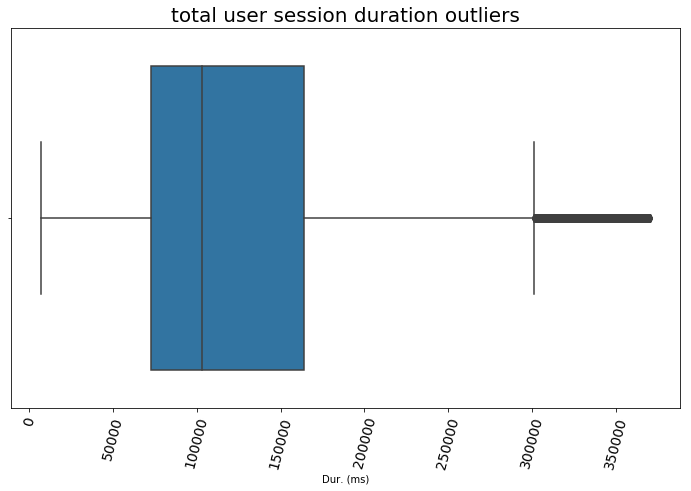

In [75]:
plot_box(df, "Dur. (ms)", "total user session duration outliers")

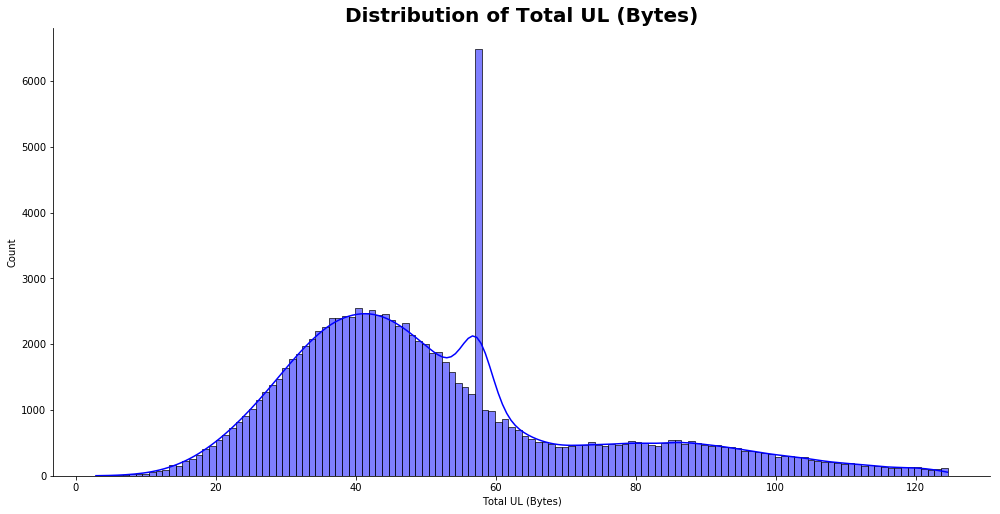

In [76]:
plot_hist(df, "Total UL (Bytes)", "blue")

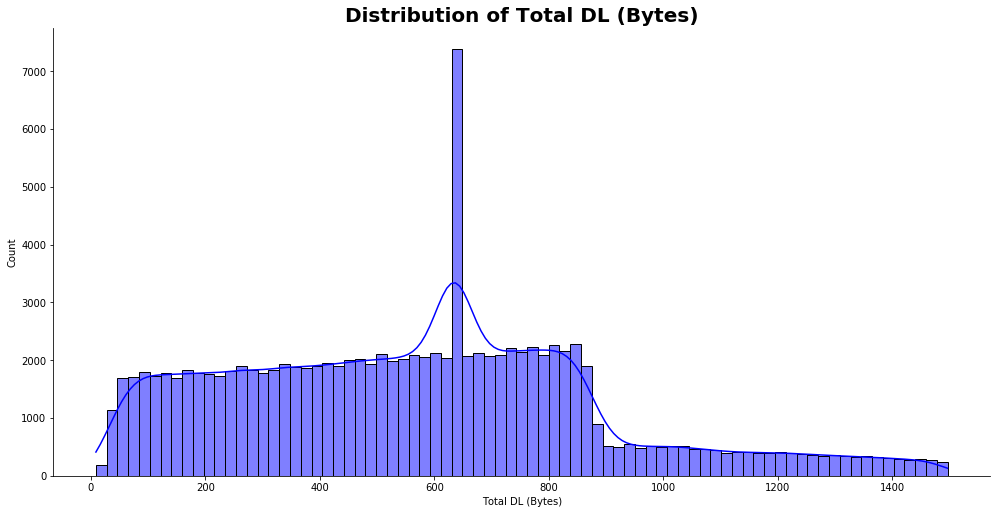

In [77]:
plot_hist(df, "Total DL (Bytes)", "blue")

## Multivariate analysis

In [78]:
def total_data_per_app(df):
    cols = ['Social Media DL (Bytes)',
     'Social Media UL (Bytes)',
     'Google DL (Bytes)',
     'Google UL (Bytes)',
     'Email DL (Bytes)',
     'Email UL (Bytes)',
     'Youtube DL (Bytes)',
     'Youtube UL (Bytes)',
     'Netflix DL (Bytes)',
     'Netflix UL (Bytes)',
     'Gaming DL (Bytes)',
     'Gaming UL (Bytes)',
     'Other DL (Bytes)',
     'Other UL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    return df
df = total_data_per_app(df)

In [79]:
df.head()

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
IMSI                                                             
204047108489451 146,572.86             60.46             78.70   
204080810288647 146,572.86             37.30            194.83   
208200101016140  86,019.00             53.79             31.38   
208200101127285  86,254.00             33.58            392.92   
208200101148045 146,572.86             71.33            961.77   

                 Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                                
204047108489451                     1.50                     0.05   
204080810288647                     0.67                     0.05   
208200101016140                     3.07                     0.05   
208200101127285                     2.54                     0.03   
208200101148045                     3.33                     0.10   

                 Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
IMSI                                                                      
204047108489451               5.99               3.23              2.52   
204080810288647               8.57               1.87              0.84   
208200101016140               0.60               1.02              3.08   
208200101127285              10.70               3.11              3.25   
208200101148045               9.12               2.55              4.23   

                 Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
IMSI                                                                        
204047108489451              0.81               18.98               21.96   
204080810288647              0.68                9.84                2.12   
208200101016140              0.58                5.56               14.33   
208200101127285              0.61               22.41                3.24   
208200101148045              1.34                4.05                9.79   

                 Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
IMSI                                                                         
204047108489451               21.62                7.22              28.09   
204080810288647               10.34               16.25             164.56   
208200101016140               15.31               16.53               3.76   
208200101127285               10.07               17.72             343.95   
208200101148045               30.75               26.59             910.30   

                 Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
IMSI                                                                     
204047108489451              14.98            389.16             12.20   
204080810288647              13.49            467.68              2.85   
208200101016140               5.36            500.04             15.93   
208200101127285               0.16            300.90              8.71   
208200101148045               7.38          1,055.87             23.57   

                 Social Media  Google  Email  Youtube  Netflix  Gaming  \
IMSI                                                                     
204047108489451          1.55    9.22   3.33    40.94    28.85   43.07   
204080810288647          0.72   10.44   1.52    11.96    26.59  178.05   
208200101016140          3.12    1.62   3.66    19.88    31.83    9.12   
208200101127285          2.58   13.81   3.86    25.66    27.79  344.11   
208200101148045          3.43   11.67   5.56    13.84    57.34  917.68   

                   Other  
IMSI                      
204047108489451   401.36  
204080810288647   470.53  
208200101016140   515.97  
208200101127285   309.61  
208200101148045 1,079.44

In [80]:
df_appdata = df[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
df_appdata.head()

Social Media  Google  Email  Youtube  Netflix  Gaming  \
IMSI                                                                     
204047108489451          1.55    9.22   3.33    40.94    28.85   43.07   
204080810288647          0.72   10.44   1.52    11.96    26.59  178.05   
208200101016140          3.12    1.62   3.66    19.88    31.83    9.12   
208200101127285          2.58   13.81   3.86    25.66    27.79  344.11   
208200101148045          3.43   11.67   5.56    13.84    57.34  917.68   

                   Other  
IMSI                      
204047108489451   401.36  
204080810288647   470.53  
208200101016140   515.97  
208200101127285   309.61  
208200101148045 1,079.44

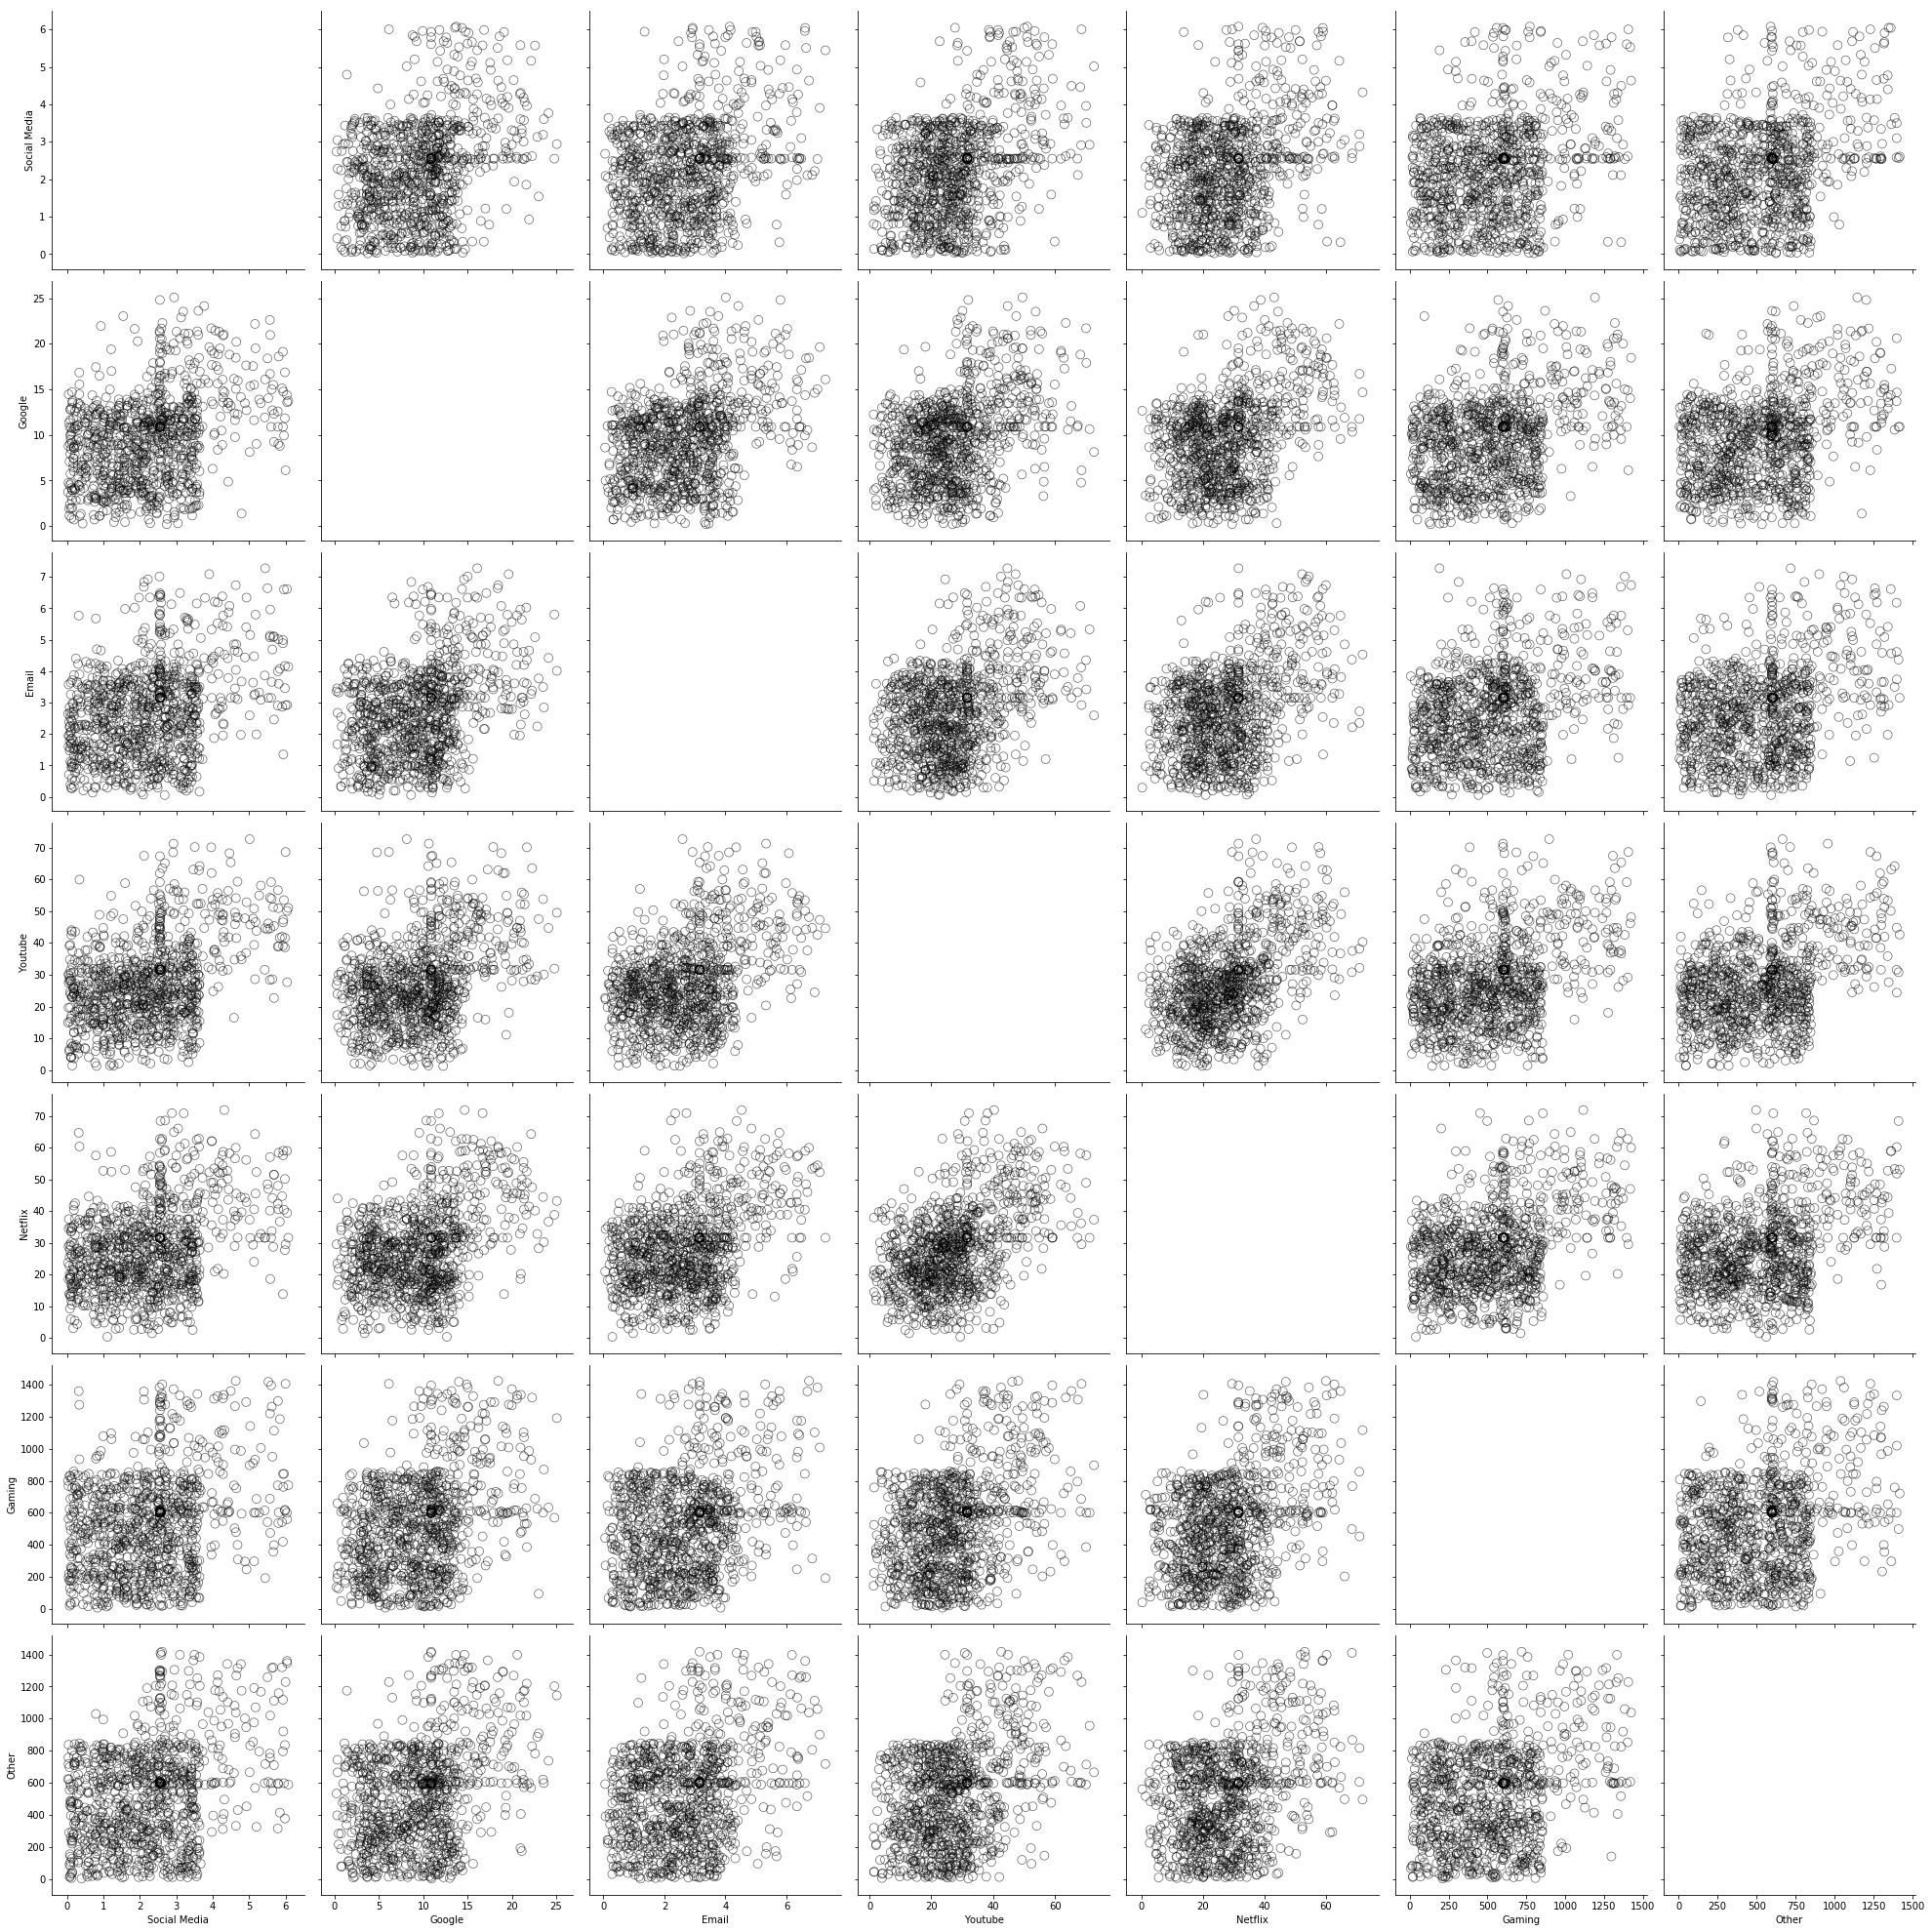

In [81]:
sns.pairplot(df_appdata.sample(1000), diag_kind = 'reg',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

## Total Data Usage per Decile class

In [82]:
df['Decile_rank'] = pd.qcut(df['Dur. (ms)'], 10,
                            labels = False)

In [90]:
df_decile = df[['Decile_rank', 'Total UL (Bytes)', 'Total DL (Bytes)']]
summarized = df_decile.groupby('Decile_rank').sum()
summarized["Total Data"] = summarized['Total UL (Bytes)'] + summarized['Total DL (Bytes)']
summarized

Total UL (Bytes)  Total DL (Bytes)   Total Data
Decile_rank                                                 
0                  448,449.83      4,970,069.04 5,418,518.87
1                  503,903.06      5,515,656.80 6,019,559.86
2                  534,414.47      5,808,902.36 6,343,316.84
3                  491,710.32      5,434,156.50 5,925,866.82
4                  434,288.12      4,745,267.87 5,179,555.99
5                  526,070.89      5,729,869.00 6,255,939.89
6                  611,270.09      6,809,755.16 7,421,025.26
7                  586,096.28      6,325,867.65 6,911,963.93
8                  633,926.75      6,859,678.84 7,493,605.59
9                  734,139.46      8,039,446.24 8,773,585.70

### Correlation Matrix

In [92]:
df_appdata = df[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
CorrelationMatrix = df.corr()
CorrelationMatrix

Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
Dur. (ms)                     1.00              0.35              0.26   
Total UL (Bytes)              0.35              1.00              0.45   
Total DL (Bytes)              0.26              0.45              1.00   
Social Media DL (Bytes)       0.25              0.43              0.31   
Social Media UL (Bytes)       0.25              0.43              0.31   
Google DL (Bytes)             0.25              0.43              0.31   
Google UL (Bytes)             0.25              0.47              0.31   
Email DL (Bytes)              0.25              0.42              0.30   
Email UL (Bytes)              0.25              0.44              0.31   
Youtube DL (Bytes)            0.25              0.43              0.32   
Youtube UL (Bytes)            0.25              0.67              0.31   
Netflix DL (Bytes)            0.24              0.43              0.32   
Netflix UL (Bytes)            0.25              0.67              0.31   
Gaming DL (Bytes)             0.25              0.42              0.99   
Gaming UL (Bytes)             0.25              0.60              0.31   
Other DL (Bytes)              0.24              0.42              0.30   
Other UL (Bytes)              0.25              0.60              0.30   
Social Media                  0.25              0.44              0.32   
Google                        0.29              0.52              0.37   
Email                         0.28              0.49              0.35   
Youtube                       0.31              0.68              0.39   
Netflix                       0.30              0.68              0.39   
Gaming                        0.25              0.43              0.99   
Other                         0.25              0.43              0.31   
Decile_rank                   0.94              0.32              0.24   

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Dur. (ms)                                   0.25                     0.25   
Total UL (Bytes)                            0.43                     0.43   
Total DL (Bytes)                            0.31                     0.31   
Social Media DL (Bytes)                     1.00                     0.29   
Social Media UL (Bytes)                     0.29                     1.00   
Google DL (Bytes)                           0.29                     0.30   
Google UL (Bytes)                           0.30                     0.30   
Email DL (Bytes)                            0.30                     0.29   
Email UL (Bytes)                            0.29                     0.29   
Youtube DL (Bytes)                          0.29                     0.29   
Youtube UL (Bytes)                          0.29                     0.29   
Netflix DL (Bytes)                          0.29                     0.29   
Netflix UL (Bytes)                          0.29                     0.29   
Gaming DL (Bytes)                           0.29                     0.29   
Gaming UL (Bytes)                           0.29                     0.30   
Other DL (Bytes)                            0.30                     0.29   
Other UL (Bytes)                            0.29                     0.29   
Social Media                                1.00                     0.31   
Google                                      0.34                     0.35   
Email                                       0.34                     0.33   
Youtube                                     0.36                     0.36   
Netflix                                     0.37                     0.36   
Gaming                                      0.30                     0.30   
Other                                       0.30                     0.29   
Decile_rank                                 0.23                     0.22   

                         Google DL (Bytes)  Google UL (Bytes)  \
Dur. (ms)                       